In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading train and test file
Train_data=pd.read_csv("bigdatamart_Train.csv")
Test_data=pd.read_csv("bigdatamart_Test.csv")

In [3]:
#exploring the data
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
#exploring the data
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
#finding the shape of the dataset
print('Train_data:',Train_data.shape)
print('Test_data:',Test_data.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [6]:
#finding description of data
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


Observation:

In [7]:
#finding null values in train data set
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
#finding null values in test data set
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
#creating one column in the dataset to specify which is train and which is test attributes
Train_data['source']='train'
Test_data['source']='test'
df=pd.concat([Train_data,Test_data],ignore_index=True)

In [10]:
#Here we get the complete dataset by combining train and test dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [11]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
#finding null values in the dataset
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
#finding shape of the complete dataset
df.shape

(14204, 13)

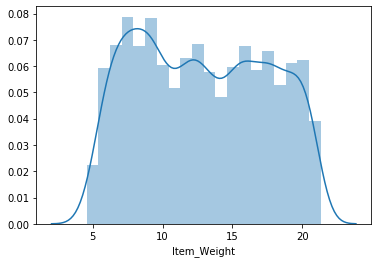

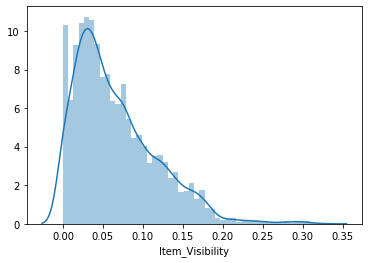

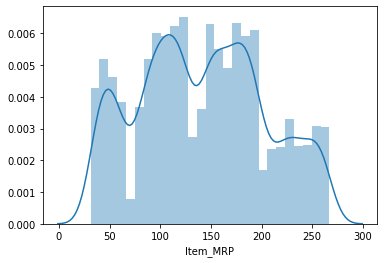

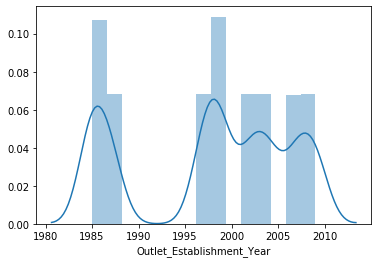

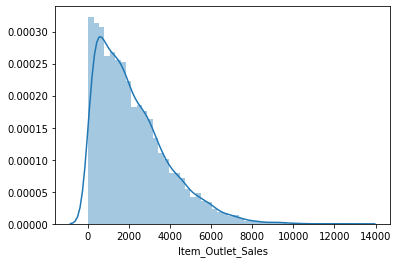

In [14]:
#visualizing distplot of each column
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

Observation: for weight: generally the weight of items are between 5 to 25
             for visibility: Here the data is skewed. That means items having less visibility are more in number as compare to the item which are larger in quantity.
             Item MRP: Here the data is widely spread between 50 to 250
             Outlet_Establishment_year: In a year of 1992 and 1993 no outlet is Established
             Item_Outlet_Sales:Here the data is skewed. The sales lies between 0 to 4000.

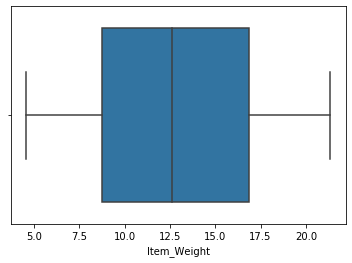

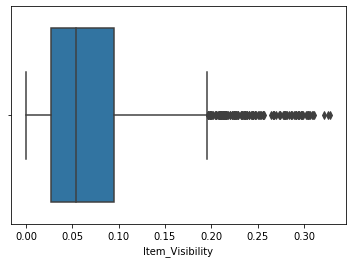

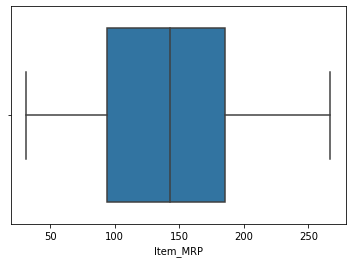

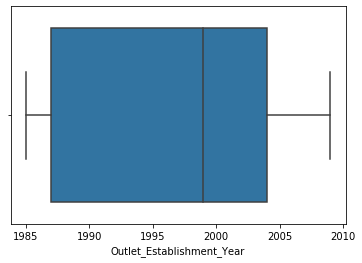

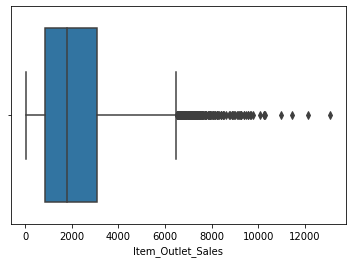

In [15]:
#Visualizing data by using boxplot
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

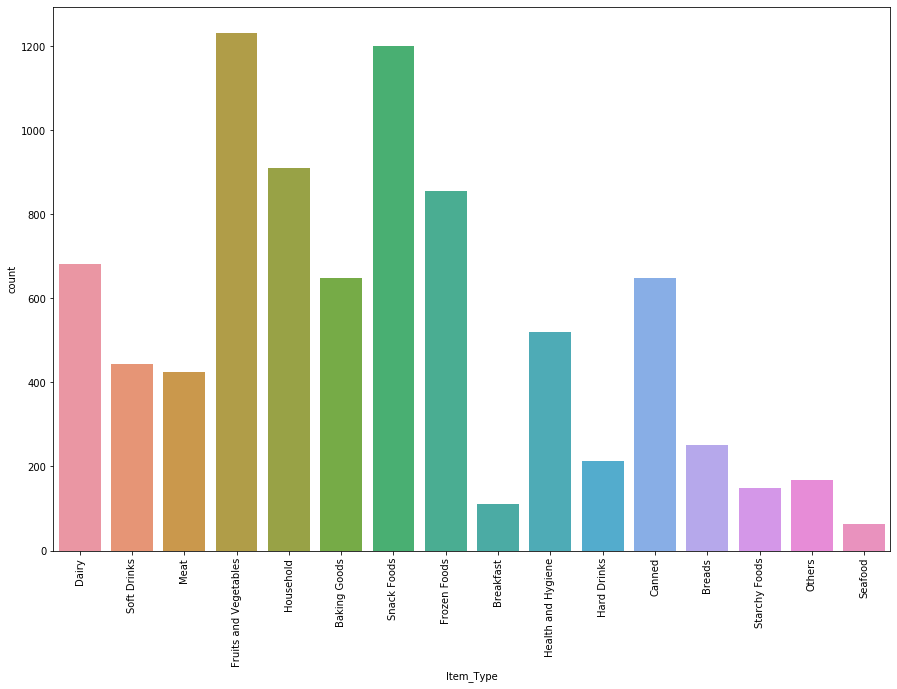

In [16]:
#visualizing by using bargarh
plt.figure(figsize=(15,10))
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=90)

In [17]:
#finding the value count of each item
Train_data.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

# Distribution of Outlet_size

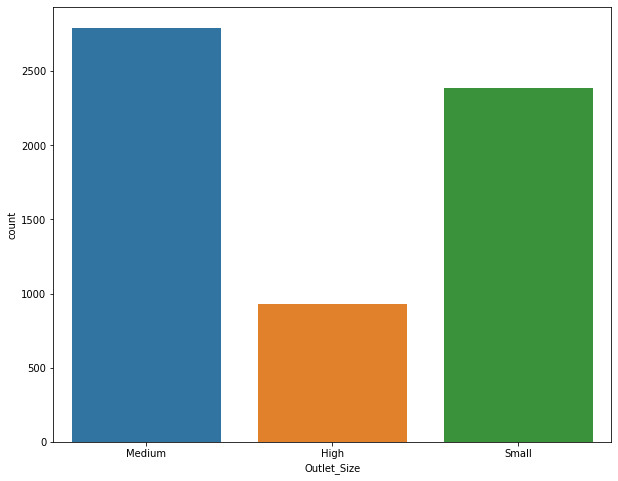

In [18]:
#visualizing count of each type of outlet
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Size)

Observation:On observing the above bargraph we get to know that the medium type of outlets are more in number as compare to high type outlet.

In [19]:
Train_data.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

# Distribution of the Outlet_Location_Type

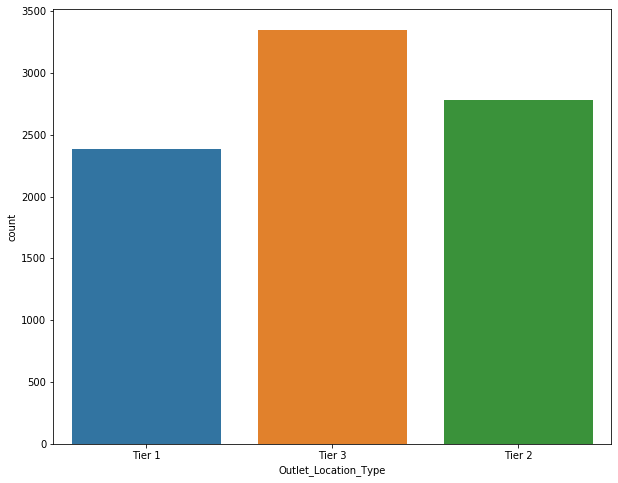

In [20]:
#Visualizing the outlets in different regions
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Location_Type)

In [21]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Observation: There are more outlets in Tier 3 regions.


# Distribution of the Outlet_Type

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

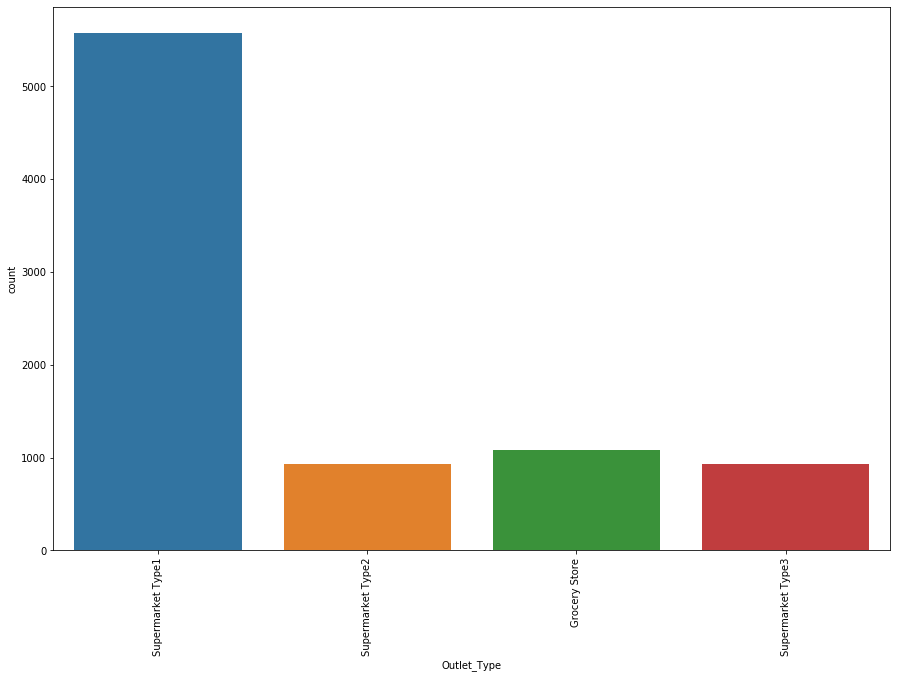

In [22]:

plt.figure(figsize=(15,10))
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=90)

In [23]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Observation: There are more supermarket Type 1 in different region where as there are less supermarket Type 2

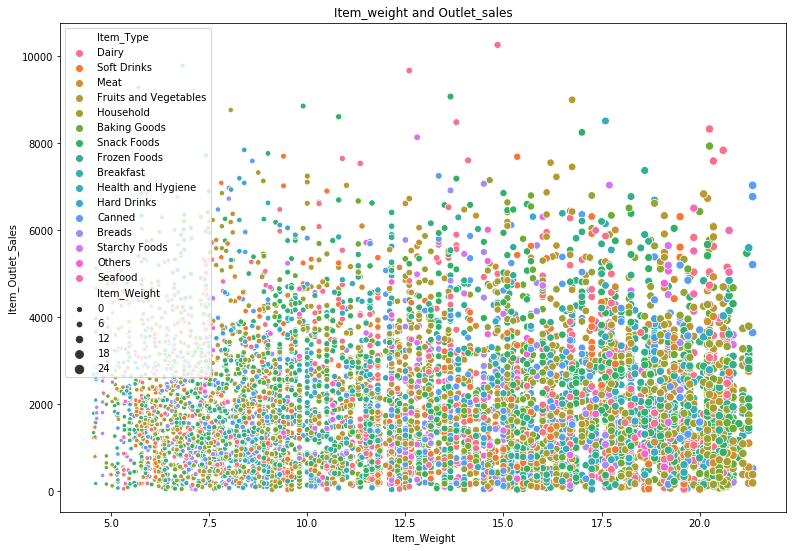

In [24]:
#visulizing scatter plot for different items present in the store
plt.figure(figsize=(13,9))
plt.xlabel("Item_weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_weight and Outlet_sales")
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)

Observation: sale of food items is more in  store.

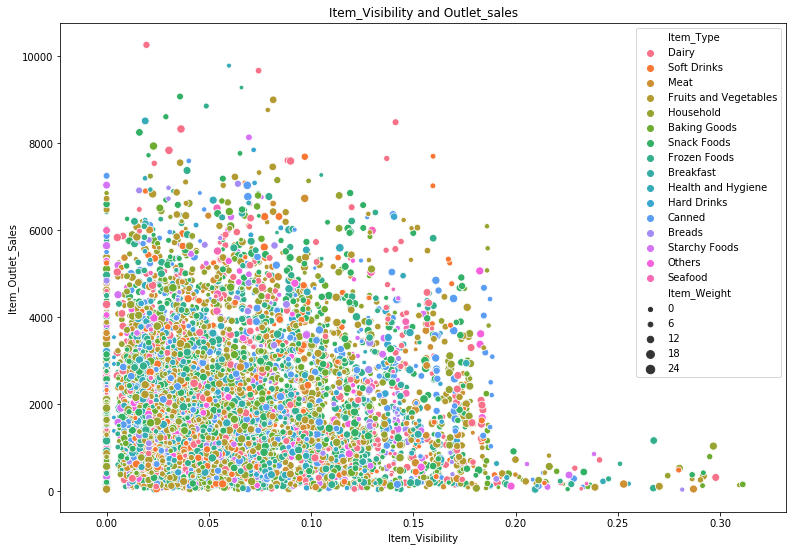

In [25]:
#Visualizing visibility of different items present in the store
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Outlet_sales")
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)

Observation: The sale of item have more visibility is less however the sale of items having poor visibility is more. May be these are food essential which is a basic requirement of every people.

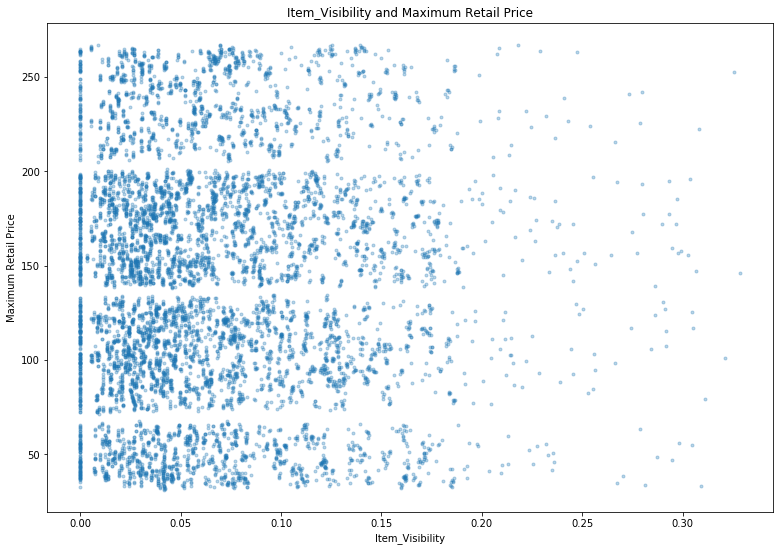

In [26]:
 #Visualization of item prices
plt.figure(figsize=(13,9))
plt.xlabel("Item_Visibility")
plt.ylabel("Maximum Retail Price")
plt.title("Item_Visibility and Maximum Retail Price")
plt.plot(Train_data.Item_Visibility,Train_data.Item_MRP,".",alpha=0.3)

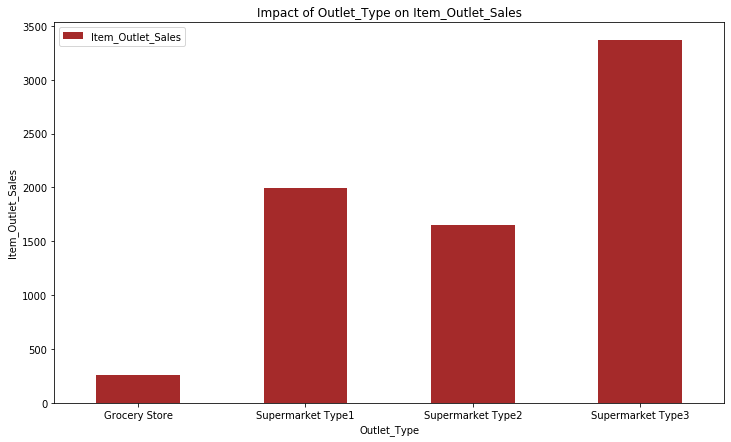

In [27]:
#impact of outlet on sales
Outlet_Type_pivot=\
Train_data.pivot_table(index='Outlet_Type',values="Item_Outlet_Sales",aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel("Outlet_Type")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Although the supermarket type 3 lesser in number but there sale is pretty much high as compare to other supermarket type. This supermarket type 3 is very huge in size which covers each and every thing under one roof. That's why ther are having more sale.

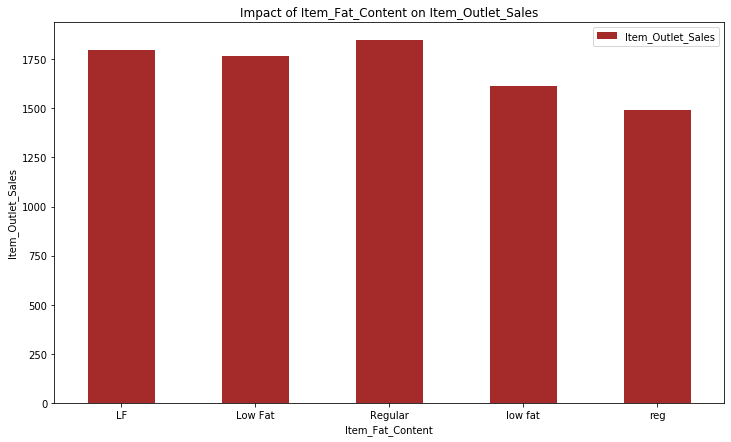

In [28]:
#impact of fat content on sales
Item_Fat_Content_pivot=\
Train_data.pivot_table(index='Item_Fat_Content',values="Item_Outlet_Sales",aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Sales of regular fat item is more

In [29]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [30]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [31]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [32]:
#finding correlation of each column with each other
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


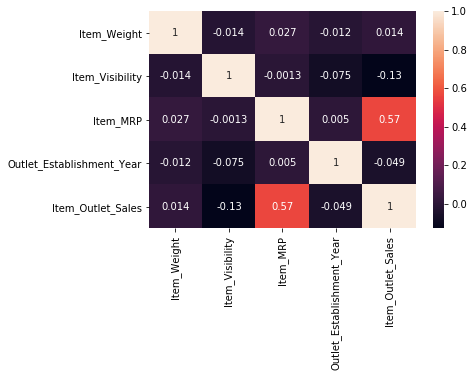

In [33]:
sns.heatmap(Train_data.corr(),annot=True)

Observation: On Observing the heatmap we get to know that MRP is highly correlated with sale. Rest remaining columns are very less correlated with sales.

# Feature Engineering and Transformation

Treating Missing Values

From the boxplot we noticed that the item_weight have many Nan values. So, we will replace null values with mean of item_weight column.

In [34]:
#Replacing the null values with mean.
df['Item_Weight'].mean()

12.792854228644991

In [35]:
#replacing null values
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

Outlet_Size

Most of the outlets are medium size so we replace null value with medium.

In [36]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [37]:
#Let's check the missing values.
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [38]:
# Item Visibility
# There are many 0 values present in the Item_Visibility column. Treat it as a null value and replace it with median value.
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [39]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

# Outlet years

In [40]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [41]:
df['Outlet_Years']=2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

# Item type

In [42]:
df['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [43]:
#The item types are either Food, drink or Non-Consumable
df['Item_Identifier'].value_counts()

DRN37    10
FDE45    10
DRH39    10
FDP25    10
FDI56    10
         ..
FDM50     7
FDM52     7
FDM10     7
DRN11     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

Observation: On observing the Item_Identifier we find that most of the items are started with FD, DR or NC that means Food, Drink or Non-Consumable. We need to group all the items under these three categories.

In [44]:
#Changing only the first two characters (i.e. the character ID)
df['New_Item_type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [45]:
#Rename them
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drink'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: New_Item_type, dtype: int64

Here, the food items are converted into three categories.

# Converting Categorical data

Label Encoder

In [46]:
#Using label encoder to convert all categorical data into 0 or 1
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()

In [47]:
df['Outlet']=label.fit_transform(df['Outlet_Identifier'])
varib=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
    df[i]=label.fit_transform(df[i])

In [48]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,Outlet
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,10,1,9
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,0,0,3
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,10,1,9
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800,train,11,1,0
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,22,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,Snack Foods,141.3154,OUT046,1997,2,0,1,NaN,test,12,1,8
14200,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,OUT018,2009,1,2,2,NaN,test,0,1,3
14201,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,OUT045,2002,1,1,1,NaN,test,7,2,7
14202,FDJ26,15.30,1,0.000000,Canned,214.6218,OUT017,2007,1,1,1,NaN,test,2,1,2


In [49]:
#Dummy variables
df=pd.get_dummies(df,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes


Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Outlet_0                       uint8
Outlet_1                       uint8
O

# Model Building

In [50]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,249.8092,OUT049,3735.1380,train,10,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,48.2692,OUT018,443.4228,train,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,141.6180,OUT049,2097.2700,train,10,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,182.0950,OUT010,732.3800,train,11,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,53.8614,OUT013,994.7052,train,22,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,141.3154,OUT046,NaN,test,12,0,1,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.60,0.142991,169.1448,OUT018,NaN,test,0,0,1,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.00,0.073529,118.7440,OUT045,NaN,test,7,1,0,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.30,0.000000,214.6218,OUT017,NaN,test,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [51]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']


In [52]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.300,0.016047,249.8092,OUT049,3735.1380,train,10,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.920,0.019278,48.2692,OUT018,443.4228,train,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.500,0.016760,141.6180,OUT049,2097.2700,train,10,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.200,0.000000,182.0950,OUT010,732.3800,train,11,0,1,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.930,0.000000,53.8614,OUT013,994.7052,train,22,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,214.5218,OUT013,2778.3834,train,22,1,0,...,0,1,0,0,0,0,0,0,0,0
8519,FDS36,8.380,0.046982,108.1570,OUT045,549.2850,train,7,0,1,...,0,0,0,0,0,0,0,1,0,0
8520,NCJ29,10.600,0.035186,85.1224,OUT035,1193.1136,train,5,1,0,...,0,0,0,0,0,0,1,0,0,0
8521,FDN46,7.210,0.145221,103.1332,OUT018,1845.5976,train,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [53]:
#droping character type data
train.drop(['Item_Identifier','Outlet_Identifier','source'],axis=1,inplace=True)

C:\Users\Suncity\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [54]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Item_Outlet_Sales,source,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,FDW58,20.750000,0.007565,107.8622,OUT049,NaN,test,10,1,0,...,0,0,0,0,0,0,0,0,0,1
8524,FDW14,8.300000,0.038428,87.3198,OUT017,NaN,test,2,0,1,...,0,0,1,0,0,0,0,0,0,0
8525,NCN55,14.600000,0.099575,241.7538,OUT010,NaN,test,11,1,0,...,1,0,0,0,0,0,0,0,0,0
8526,FDQ58,7.315000,0.015388,155.0340,OUT017,NaN,test,2,1,0,...,0,0,1,0,0,0,0,0,0,0
8527,FDY38,12.792854,0.118599,234.2300,OUT027,NaN,test,24,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.500000,0.013496,141.3154,OUT046,NaN,test,12,0,1,...,0,0,0,0,0,0,0,0,1,0
14200,FDD47,7.600000,0.142991,169.1448,OUT018,NaN,test,0,0,1,...,0,0,0,1,0,0,0,0,0,0
14201,NCO17,10.000000,0.073529,118.7440,OUT045,NaN,test,7,1,0,...,0,0,0,0,0,0,0,1,0,0
14202,FDJ26,15.300000,0.000000,214.6218,OUT017,NaN,test,2,0,1,...,0,0,1,0,0,0,0,0,0,0


In [55]:
#droping character type data
test.drop(['Item_Identifier','Outlet_Identifier','source'],axis=1,inplace=True)

C:\Users\Suncity\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [56]:

test

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
8523,20.750000,0.007565,107.8622,NaN,10,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
8524,8.300000,0.038428,87.3198,NaN,2,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8525,14.600000,0.099575,241.7538,NaN,11,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
8526,7.315000,0.015388,155.0340,NaN,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8527,12.792854,0.118599,234.2300,NaN,24,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500000,0.013496,141.3154,NaN,12,0,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
14200,7.600000,0.142991,169.1448,NaN,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
14201,10.000000,0.073529,118.7440,NaN,7,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14202,15.300000,0.000000,214.6218,NaN,2,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [57]:
train.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1',
       'Outlet_Location_Type_0', 'Outlet_Location_Type_1',
       'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1',
       'Outlet_Size_2', 'New_Item_type_0', 'New_Item_type_1',
       'New_Item_type_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2',
       'Outlet_Type_3', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3',
       'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9'],
      dtype='object')

In [58]:
#training the model
x_train1 = train
x_test1= test
y_train1=Train_data['Item_Outlet_Sales']

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=.33,random_state=r_state)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score) 

max r2 score corresponding to 42 is 1.0


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [61]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=.33,random_state=42)

In [62]:
#lets use grid_search to find optimal value of n_neighbors for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x_train,y_train)
gknr.best_params_

{'n_neighbors': 1}

In [63]:
#importing algorithms
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [64]:
#finding best parameter for RandomForestRegressor by using gridsearch cv

def Grid_Search_CV_RFR(x_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(x_train, y_train)

    return grid.best_score_ , grid.best_params_

In [65]:
def RFR(x_train, x_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(x_train,y_train)
    y_predict = estimator.predict(x_test)
    print ("R2 score:",r2_score(y_test,y_predict))
    return y_test,y_predict

In [66]:
for i in range(5):
    print ("Loop: " , i)
    print ("--------------") 
    x_train, x_test, y_train, y_test = train_test_split(x_train1, y_train1, test_size=0.2)
    best_score, best_params = Grid_Search_CV_RFR(x_train, y_train)
    y_test , y_predict = RFR(x_train, x_test, y_train, y_test, best_params)
    print ("Best Score:" ,best_score)
    print ("Best params:",best_params)

Loop:  0
--------------
R2 score: 0.9998412453033022
Best Score: 0.9996304076898597
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
Loop:  1
--------------
R2 score: 0.9999864364751518
Best Score: 0.9998773249301308
Best params: {'bootstrap': False, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}
Loop:  2
--------------
R2 score: 0.9999947932201486
Best Score: 0.9998770388730375
Best params: {'bootstrap': False, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 10}
Loop:  3
--------------
R2 score: 0.9999692910875349
Best Score: 0.9998567497098451
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 4, 'n_estimators': 20}
Loop:  4
--------------
R2 score: 0.9982664182622176
Best Score: 0.9999267482306259
Best params: {'bootstrap': True, 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 20}


In [67]:
#finding best parameter for svr by using Gridsearch cv
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','poly','rbf','sigmoid'),'C':[1,10]}
svr=SVR()
clf=GridSearchCV(svr,parameters)
clf.fit(x_train1,y_train1)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.9999999982700103
linear
{'C': 1, 'kernel': 'linear'}


In [68]:
#finding best parameter for adaboost by using grid search cv
from sklearn.ensemble import AdaBoostRegressor
n_estimators={"n_estimators":range(1,30)}
ad=AdaBoostRegressor()
gad=GridSearchCV(ad,n_estimators,cv=10)
gad.fit(x_train1,y_train1)
gad.best_params_

{'n_estimators': 25}

In [76]:
#applying for loop for all the models
from sklearn.linear_model import LinearRegression
knr=KNeighborsRegressor(n_neighbors=1)
svr=SVR(C= 1, kernel= 'linear')
lr=LinearRegression(normalize=True)
dtr=DecisionTreeRegressor(criterion= 'mae', max_depth= 6, max_leaf_nodes= 20, min_samples_leaf= 20, min_samples_split= 10)
rfr=RandomForestRegressor(bootstrap= False, max_features= 'auto', min_samples_split= 2, n_estimators= 10)
ad=AdaBoostRegressor(n_estimators=25)


In [77]:
models=[]
models.append(('KNeighborsRegressor',knr))
models.append(('SupportVectorMachine',svr))
models.append(('LinearRegressor',lr))
models.append(('DecisionTreeRegressor',dtr))
models.append(('RandomForestRegressor',rfr))
models.append(('AdaBoostRegressor',ad))

In [78]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [79]:
Model=[]
sco=[]
r2score=[]
cvs=[]

for name,model in models:
    print('************',name,'************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train) 
    
    print(model)
    score=model.score(x_train,y_train)
    score1=score.mean()
    pre=model.predict(x_test)
    print('\n')    
    sco.append(score1)
    print('score:',score1)
    MSE=mean_squared_error(y_test,pre)
    print('mean squared error',MSE)
    MAE=mean_absolute_error(y_test,pre)
    print('mean absolute error',MAE)
    R2score= r2_score(y_test,pre)
    print('r2_score',R2score)
    r2score.append(R2score*100)
    print('\n')
    sc=cross_val_score(model,x_train1,y_train1,cv=10).mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    

************ KNeighborsRegressor ************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')


score: 1.0
mean squared error 3481.9582241140165
mean absolute error 6.5674043401759565
r2_score 0.9988922857537393


Cross_Val_Score= 0.9999127814156651


************ SupportVectorMachine ************


SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


score: 0.9999999983086132
mean squared error 0.004868476710210748
mean absolute error 0.06449851016268818
r2_score 0.999999998451193


Cross_Val_Score= 0.9999999982729794


************ LinearRegressor ************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


score: 1.0
mean squared error 8.040508591789342e-24
mean absolute error 2.2254531876492324e-12
r2_score 1.0


C

In [80]:
result=pd.DataFrame({'Model':Model,'score':sco,'R2_score':r2score,'Cross_val_score':cvs})
result

,Model,score,R2_score,Cross_val_score
0,KNeighborsRegressor,1.000000,99.889229,99.991278
1,SupportVectorMachine,1.000000,100.000000,100.000000
2,LinearRegressor,1.000000,100.000000,100.000000
3,DecisionTreeRegressor,0.994638,98.549712,99.322451
4,RandomForestRegressor,1.000000,99.830244,99.983817
5,AdaBoostRegressor,0.992922,99.075913,99.144382


Observation: We observe that SVM and LinearRegression is the best model. Let us finalize our model with LinearRegression.

In [81]:
#saving the model
from sklearn.externals import joblib
joblib.dump(lr,'Mart.pkl')


C:\Users\Suncity\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['Mart.pkl']